### Housing Price Estimation

Here, we will train a machine learning model to predict housing price based on its total area (in sq ft). We will use univariate linear regression to train the model.
- **Feature**: Area of house (measured in square foot)
- **Target**: Price of the house (in $)

The feature values will be normalized using `z-score normalization`.
We will follow the `90-10` rule for segregating the dataset into training and validation sets i.e., 90% of the data will be used for training the model and 10% of the dataset will be used for validating the trained model.

**Note:** Model has been trained with L2-regularization to avoid overfitting.

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from models import LinearRegression
from utils import Normalization

In [2]:
def process_data():
    df = pd.read_csv('./datasets/housing.csv')
    total_rows = df.shape[0]
    train_rows = math.ceil(0.9 * total_rows)
    training_set = df[:train_rows]
    validation_set = df[train_rows:]
    print(f"There are {training_set.shape[0]} row(s) in the training set.")
    print(f"There are {validation_set.shape[0]} row(s) in the validation set.")

    x_tr = training_set['area'].to_numpy(dtype=float)
    x_tr = np.reshape(x_tr, (x_tr.shape[0], 1))
    x_tr = Normalization.zscore(x_tr)
    z_tr = np.ones((x_tr.shape[0], 1), dtype=float)
    x_tr = np.concatenate((z_tr, x_tr), axis=1)
    y_tr = training_set['price'].to_numpy(dtype=float)
    y_tr = np.reshape(y_tr, (y_tr.shape[0], 1))

    x_val = validation_set['area'].to_numpy(dtype=float)
    x_val = np.reshape(x_val, (x_val.shape[0], 1))
    x_val = Normalization.zscore(x_val)
    z_val = np.ones((x_val.shape[0], 1), dtype=float)
    x_val = np.concatenate((z_val, x_val), axis=1)
    y_val = validation_set['price'].to_numpy(dtype=float)
    y_val = np.reshape(y_val, (y_val.shape[0], 1))

    return x_tr, y_tr, x_val, y_val

There are 491 row(s) in the training set.
There are 54 row(s) in the validation set.


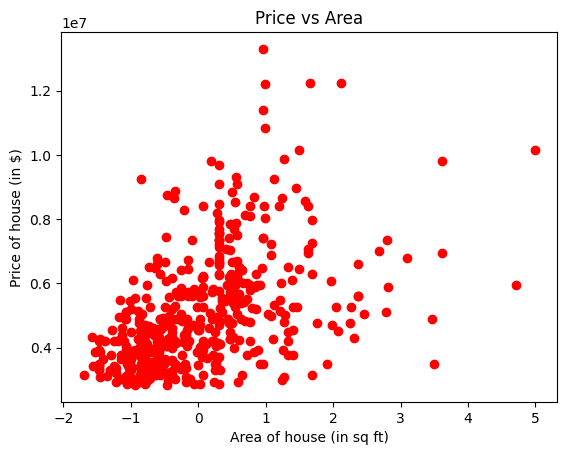

In [3]:
x_train, y_train, x_validate, y_validate = process_data()
m, n = x_train.shape

plt.plot(x_train[:,1:], y_train, 'ro')
plt.title("Price vs Area")
plt.xlabel("Area of house (in sq ft)")
plt.ylabel("Price of house (in $)")
plt.show()

Model parameters: w = [[4101480.12274019]
 [ 712731.23223275]] | Minimum cost value = 3,596,191,610,476.073


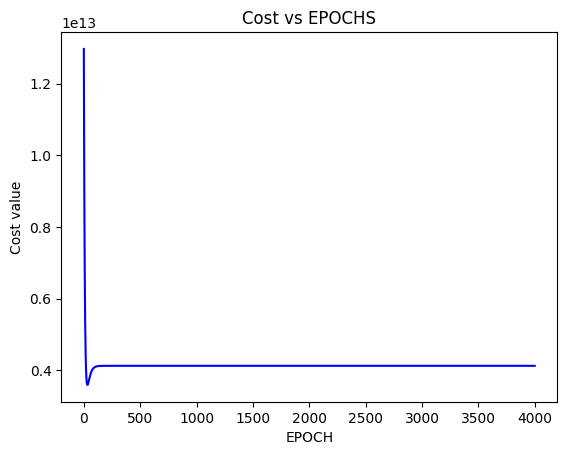

In [4]:
model = LinearRegression(0.05, 4000, 0.45)
cost_values = model.train_gd(x_train, y_train)
print(f"Model parameters: w = {model.w_final} | Minimum cost value = {model.cost_final:,}")

plt.plot(cost_values, 'b')
plt.title("Cost vs EPOCHS")
plt.xlabel("EPOCH")
plt.ylabel("Cost value")
plt.show()

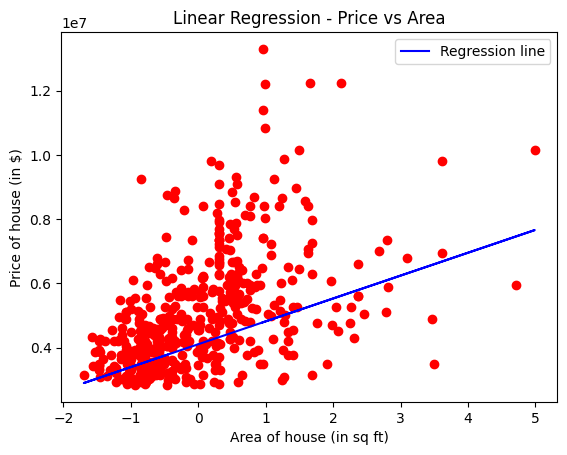

In [5]:
y_pred_hat = model.predict(x_train)

plt.plot(x_train[:,1:], y_train, 'ro')
plt.plot(x_train[:,1:], y_pred_hat, 'b', label='Regression line')
plt.title("Linear Regression - Price vs Area")
plt.xlabel("Area of house (in sq ft)")
plt.ylabel("Price of house (in $)")
plt.legend()
plt.show()

In [6]:
m_validate, n_validate = x_validate.shape

cost_validate = model.validate(x_validate, y_validate)
print(f"The minimum cost obtained from training set is {model.cost_final:,}")
print(f"The cost value obtained from validation set is {cost_validate:,}.")

if cost_validate > model.cost_final:
    percent_increase = ((cost_validate / model.cost_final) * 100) - 100
    print(f"Validation cost is {percent_increase:.2f}% higher than the training cost.")
else:
    percent_increase = ((model.cost_final / cost_validate) * 100) - 100
    print(f"Training cost is {percent_increase:.2f}% higher than the validation cost.")

The minimum cost obtained from training set is 3,596,191,610,476.073
The cost value obtained from validation set is 3,690,071,870,313.7256.
Validation cost is 2.61% higher than the training cost.


In [7]:
model_r2 = model.r2_score(x_validate, y_validate)
print(f"The R2 score for the model is {model_r2}.")

The R2 score for the model is 1345.1720761980669.
